# Muon telescope parameters calculation

This script computes the angular resolution and acceptance of any moun telescope by inputing the number of scintillator bars and dimmensions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

## Solid angle

In [4]:
nBars = 20
d = 1       # 4 Pixel size (cm)
D = 100.0  # 134 Panel separation


A = d**2    #  Pixel area
d_Omega =  A/(D**2)

theta = int(np.rad2deg(np.arctan(d*nBars/D)))/float(nBars)

Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1         # Shiffting index

r = np.zeros((Nd,Nd))

matrix_P1 = np.zeros((nBars, nBars))
matrix_P2 = np.ones((nBars, nBars))

for i in range(nBars):
    for j in range(nBars):
        for k in range(nBars):
            for l in range(nBars):

                h = k-i
                b = l-j
                ik = np.abs(k-i)
                jl = np.abs(l-j)

                E = np.sqrt((ik*d)**2 + (jl*d)**2)
                r[h+C,b+C]= np.sqrt(D**2 + E**2)

In [5]:
solid_Ang = A/((r/2)**2)

/tmp/ipykernel_106028/3418752535.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelsx.astype(int))
/tmp/ipykernel_106028/3418752535.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labelsy.astype(int))


Angular aperture = 22.0 deg
Angular aperture = 0.39 rad
Angular resolution = 20.0 mrad


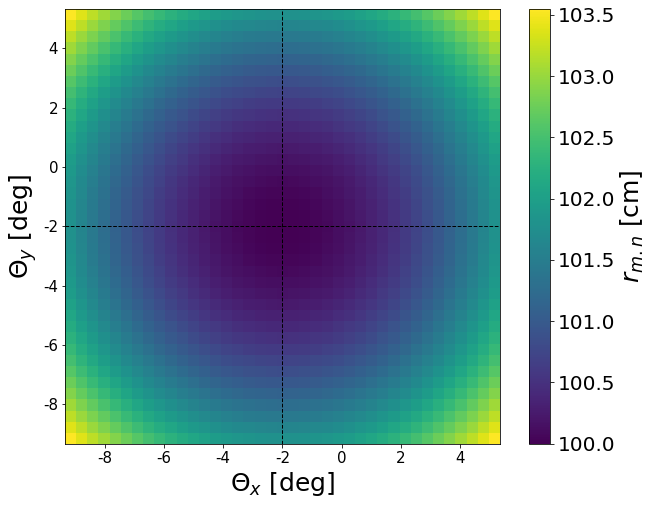

In [6]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$ [deg]", fontsize = 25)
ax.set_ylabel("$\Theta_y$ [deg]", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(r, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('$r_{m.n}$ [cm]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('figures/Radious.eps', format='eps', bbox_inches='tight', pad_inches=0)

delta_theta = 2*np.tan(d/D)
                       
print ("Angular aperture = " + str(2*nBars*theta) + " deg")
print ("Angular aperture = " + str(np.round(2*np.arctan(nBars*d/D),2)) + " rad")
print ("Angular resolution = " + str(np.round(1000*delta_theta,2)) + " mrad")

In [7]:
L = 50 # distance from volcano [m]
delta_x = L*np.tan(delta_theta)
print ("Spatial resolution on the volcano = %s m" % str(np.round(delta_x,2)))

Spatial resolution on the volcano = 1.0 m


/tmp/ipykernel_106028/4167934276.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelsx.astype(int))
/tmp/ipykernel_106028/4167934276.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labelsy.astype(int))


maximum solid angle = 0.4
minimum solid angle = 0.37306472673008767


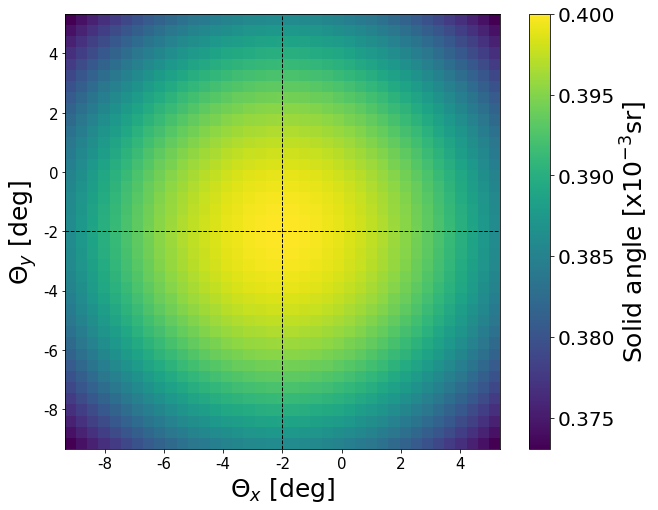

In [8]:

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$ [deg]", fontsize = 25)
ax.set_ylabel("$\Theta_y$ [deg]", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(solid_Ang*1000, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Solid angle [x10$^{-3}$sr]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)


Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('figures/Solid_angle.eps', format='eps', bbox_inches='tight', pad_inches=0)

print ("maximum solid angle = " + str(np.max(solid_Ang*1000)))
print ("minimum solid angle = " + str(np.min(solid_Ang*1000)))

/tmp/ipykernel_106028/3362321229.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


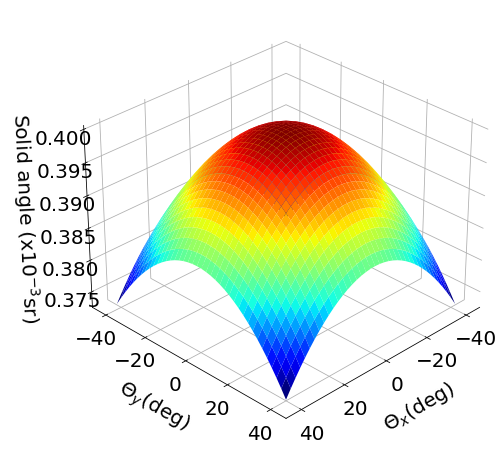

In [9]:
data_array = np.array(solid_Ang)

fig = plt.figure(figsize=(12, 8))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z*1000, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(np.min(Z*1000), Z.max()*1000)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20, labelpad=15)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20, labelpad=15)
ax.set_zlabel('Solid angle (x10$^{-3}$sr)', fontsize = 20, labelpad=15)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 45)

## Acceptance

The number of muons detected by the telescope for a given direction $r_{m,n}$ reads

$$N(r_{m,n}, \Delta T)=I(r_{m,n}) \times \Delta T \times \mathcal{T}(r_{m,n})  $$

where $I$ is the flux of muons given in $cm^{-2}sr^{-1}s^{-1}$, $\Delta T$ is the duration of the measured period, and $\mathcal{T}$ is the telescope acceptance experessed in $cm^2 sr$. The acceptance may be written as,


$$\mathcal{T}(r_{m,n}) = S(r_{m,n}) \times \delta \Omega (r_{m,n})$$

where $S$ is the detection surface and $\delta \Omega$ is the angular aperture.

In [10]:

Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1        # Shiffting index

n_Pixel = np.zeros((Nd,Nd))

matrix_P1 = np.zeros((nBars, nBars))
matrix_P2 = np.ones((nBars, nBars))

for i in range(nBars):
    for j in range(nBars):
        matrix_P1[i,j] = 1
        for k in range(nBars):
            for l in range(nBars):

                if matrix_P1[i,j]== 1:
                    iP1 = i
                    jP1 = j
                if matrix_P2[k,l]== 1:
                    iP2 = k
                    jP2 = l

                h = iP1 - iP2
                b = jP1 - jP2

                n_Pixel[h+C,b+C]= n_Pixel[h+C,b+C] + 1
                
print ("Maximum number of pixel = " + str(np.max(n_Pixel)))

Maximum number of pixel = 400.0


/tmp/ipykernel_106028/1944302510.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelsx.astype(int))
/tmp/ipykernel_106028/1944302510.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labelsy.astype(int))


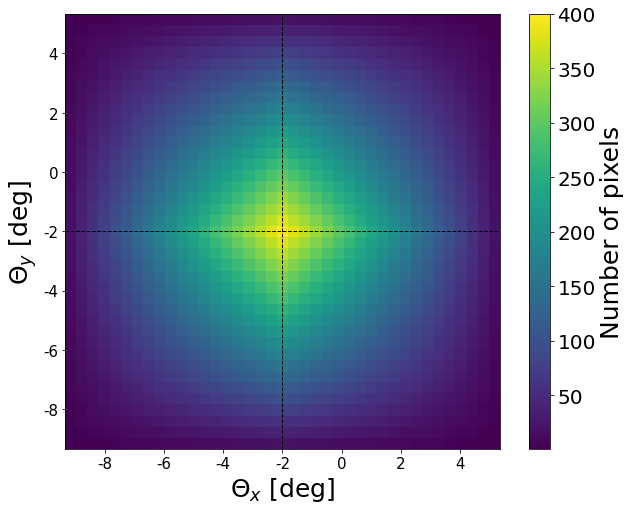

In [11]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$ [deg]", fontsize = 25)
ax.set_ylabel("$\Theta_y$ [deg]", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(n_Pixel, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Number of pixels', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

#plt.savefig('figures/Pixels.eps', format='eps')

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

/tmp/ipykernel_106028/1157215819.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelsx.astype(int))
/tmp/ipykernel_106028/1157215819.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labelsy.astype(int))


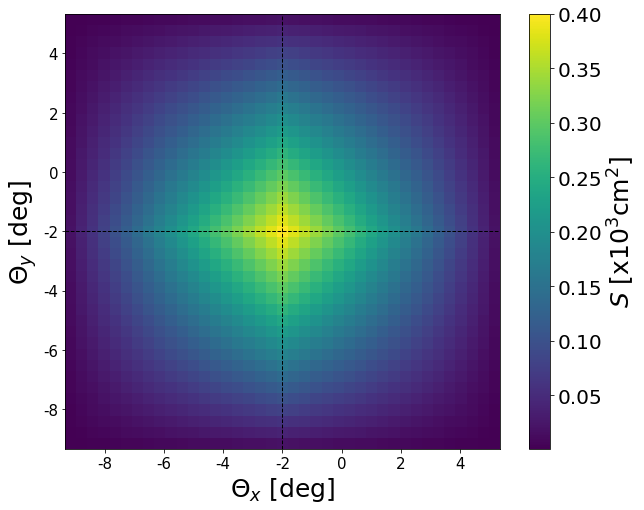

In [12]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$ [deg]", fontsize = 25)
ax.set_ylabel("$\Theta_y$ [deg]", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(n_Pixel*A/1000, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('$S$ [x10$^{3}$cm$^2$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

#plt.savefig('figures/Area.eps', format='eps', bbox_inches='tight', pad_inches=0)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


In [13]:
acceptance = np.zeros((Nd,Nd))

for i in range(Nd):
    for j in range(Nd):
        
        acceptance[i,j] = n_Pixel[i,j]*solid_Ang[i,j]*A/4

/tmp/ipykernel_106028/34148978.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelsx.astype(int))
/tmp/ipykernel_106028/34148978.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labelsy.astype(int))


maximum acceptance = 0.04
minimum acceptance = 0.0


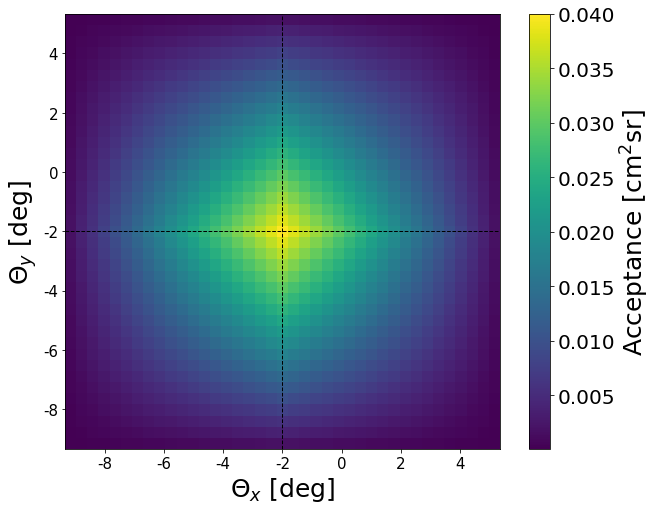

In [14]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$ [deg]", fontsize = 25)
ax.set_ylabel("$\Theta_y$ [deg]", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(acceptance, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Acceptance [cm$^2$sr]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('figures/Aceptancia.eps', format='eps', bbox_inches='tight', pad_inches=0)

print ("maximum acceptance = " + str(np.round(np.max(acceptance),2)))
print ("minimum acceptance = " + str(np.round(np.min(acceptance),3)))

/tmp/ipykernel_106028/3267412851.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


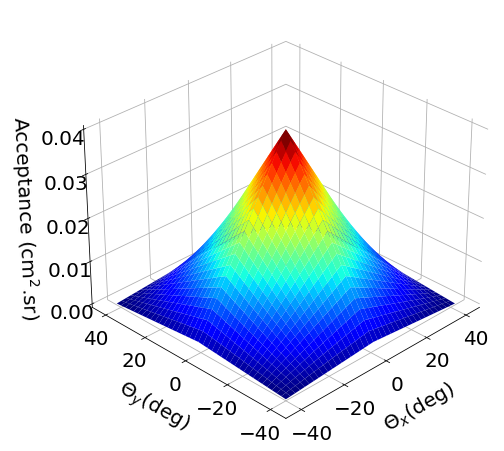

In [15]:
data_array = np.array(acceptance)

fig = plt.figure(figsize=(12, 8))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, Z.max())
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20, labelpad=15)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20, labelpad=15)
ax.set_zlabel('Acceptance (cm$^2$.sr)', fontsize = 20, labelpad=15)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 225)